# Data Science - Mini Project 1 - Alex Montoya Franco
## Where do I book accommodation?

## Step 1 - Webscraping

*   Choose a city in the world on the condition that there are at least 50 accommodations to book in its neighborhoods.
  *   **Rotterdam, Netherlands**
*   Choose a date for the trip.
  *   **2022-11-24 to 2022-11-27**
*   Scrape the data about the available accommodations for that city from three 
accommodation booking websites.
  *   [Orbitz](https://www.orbitz.com/) - [Hotels.com](https://www.hotels.com/) - [Agoda](https://www.agoda.com/en-gb/)

#### Installing Selenium and chromium-chromedriver

In [ ]:
# Installing Selenium and required tools
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 6.8 MB/s 
     |████████████████████████████████| 140 kB 64.1 MB/s 
     |████████████████████████████████| 358 kB 59.4 MB/s 
     |████████████████████████████████| 58 kB 6.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.
Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 https://developer.downlo

#### Setting up Scraper

In [ ]:
# Importing libraries
from selenium import webdriver
from selenium.webdriver.common.by import By

import requests

from bs4 import BeautifulSoup

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
# Configuring selenium scraper (driver)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36 Edg/105.0.1343.50'
chrome_options.add_argument('user-agent={0}'.format(user_agent))

#### Setting up Data Storage

In [ ]:
import csv

In [ ]:
rotterdam_accommodations_csv_file = open('Rotterdam_Accommodations.csv', 'w')

In [ ]:
csv_writer = csv.writer(rotterdam_accommodations_csv_file)
csv_writer.writerow(['hotel_name', 'review_score', 'accommodation_price', 'hotel_rating', 'hotel_address', 'listing_url', 'source'])

91

#### Scraping Orbitz: https://www.orbitz.com/

In [ ]:
# Creating scraper
orbitz_driver = webdriver.Chrome('chromedriver', options=chrome_options)

In [ ]:
orbitz_url = 'https://www.orbitz.com/Hotel-Search?adults=1&d1=2022-11-24&d2=2022-11-27&destination=Rotterdam%20%28and%20vicinity%29%2C%20South%20Holland%2C%20Netherlands&endDate=2022-11-27&latLong=51.923538%2C4.47409&regionId=6035270&rooms=1&semdtl=&sort=RECOMMENDED&startDate=2022-11-24&theme=&useRewards=false&userIntent='

In [ ]:
# Access Orbitz website
orbitz_driver.get(orbitz_url)

In [ ]:
# Scroll down until the end of the page so that all posts are loaded correctly and can be scraped
orbitz_driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [ ]:
# Printing the website's title helps in identifying whether we have access to the page or not
# 'Access denied' will appear when no user-agent has been set to emulate a browser's interaction with the website
print(orbitz_driver.title)

Rotterdam (and vicinity), South Holland, Netherlands Hotel Search Results


In [ ]:
# Getting the source code of the website to continue scraping process with BeautifulSoup
orbitz_source_code = orbitz_driver.page_source

In [ ]:
# Creating BeautifulSoup object
orbitz_scraper = BeautifulSoup(orbitz_source_code, 'lxml')

In [ ]:
# Getting Orbitz accomodation offers
orbitz_accommodations = orbitz_scraper.find_all('li', class_='uitk-spacing uitk-spacing-margin-blockstart-three')

In [ ]:
# Validating the amount of elements (accomodation offers) which can be scraped
len(orbitz_accommodations)

50

##### Scraping Orbitz Data and Printing it

In [ ]:
# Helper function to get the data from the inner pages (individual accommodations)
def get_subpage_orbitz_data(url):
  page = requests.get(url)
  soup = BeautifulSoup(page.text, 'lxml')

  hotel_address = soup.find('div', class_='uitk-text uitk-type-300 uitk-text-default-theme uitk-layout-flex-item uitk-layout-flex-item-flex-basis-full_width').text
  print("Hotel Address: " + hotel_address)

  hotel_rating = ""
  try:
    hotel_rating = soup.find('div', class_='uitk-rating').span.text
    print("Hotel Rating: " + hotel_rating)
  except:
    hotel_rating = "No Rating Available"
    print("Hotel Rating: " + hotel_rating)
  
  subpage_data = (hotel_address, hotel_rating) 

  return subpage_data

In [ ]:
# Scraping Orbitz Accomodations data

print("Orbitz Accommodations")
print("Rotterdam (2022-11-24 to 2022-11-27)")
print("----")

index = 1
for orbitz_listing in orbitz_accommodations:

  print("Orbitz Listing #" + str(index))
  
  hotel_name = orbitz_listing.find('h2', class_='uitk-heading uitk-heading-5 overflow-wrap').text
  print("Hotel's Name: " + hotel_name)

  try:
    review_score = orbitz_listing.find('span', class_='uitk-text uitk-type-300 uitk-type-bold uitk-text-default-theme').text
    print("Review Score: " + review_score)
  except:
    review_Score = "No review available"
    print("Review Score: " + review_score)

  price = orbitz_listing.find('div', class_='uitk-text uitk-type-600 uitk-type-bold uitk-text-emphasis-theme').text
  print("Price: " + price)

  url = orbitz_listing.find('a', class_='uitk-card-link')['href']
  url = "https://www.orbitz.com"+url
  print("Listing url: " + url)

  hotel_address, hotel_rating = get_subpage_orbitz_data(url)

  # ['hotel_name', 'review_score', 'accommodation_price', 'hotel_rating', 'hotel_address', 'listing_url', 'source']
  csv_writer.writerow([hotel_name, review_score, price, hotel_rating, hotel_address, url, "Orbitz"])

  index += 1

  print("----")

Orbitz Accommodations
Rotterdam (2022-11-24 to 2022-11-27)
----
Orbitz Listing #1
Hotel's Name: Rotterdam Marriott Hotel
Review Score: 4.5/5
Price: $112
Listing url: https://www.orbitz.com/Rotterdam-Hotels-Rotterdam-Marriott-Hotel.h544711.Hotel-Information?chkin=2022-11-24&chkout=2022-11-27&x_pwa=1&rfrr=HSR&pwa_ts=1664084816425&referrerUrl=aHR0cHM6Ly93d3cub3JiaXR6LmNvbS9Ib3RlbC1TZWFyY2g%3D&useRewards=false&rm1=a1&regionId=6035270&destination=Rotterdam+%28and+vicinity%29%2C+South+Holland%2C+Netherlands&destType=MARKET&neighborhoodId=716017732738949120&sort=RECOMMENDED&top_dp=112&top_cur=USD&semdtl=&userIntent=&selectedRoomType=211208584&selectedRatePlan=385338285
Hotel Address: Weena 686, Rotterdam, 3012 CN
Hotel Rating: 5.0 star property
----
Orbitz Listing #2
Hotel's Name: Room Mate Bruno
Review Score: 4.5/5
Price: $84
Listing url: https://www.orbitz.com/Rotterdam-Hotels-Room-Mate-Bruno.h21609226.Hotel-Information?chkin=2022-11-24&chkout=2022-11-27&x_pwa=1&rfrr=HSR&pwa_ts=166408481642

In [ ]:
# Closing Scraper (closing all browser windows and ending the WebDriver session)
orbitz_driver.quit()

#### Scraping Hotels.com: https://www.hotels.com/

In [ ]:
# Creating scraper
hotelscom_driver = webdriver.Chrome('chromedriver', options=chrome_options)

In [ ]:
hotelscom_url = 'https://www.hotels.com/Hotel-Search?adults=1&d1=2022-11-24&d2=2022-11-27&destination=Rotterdam%2C%20South%20Holland%2C%20Netherlands&endDate=2022-11-27&latLong=%2C&regionId=3046&selected=&semdtl=&sort=RECOMMENDED&startDate=2022-11-24&theme=&useRewards=false&userIntent='

In [ ]:
# Access Hotels.com website
hotelscom_driver.get(hotelscom_url)

In [ ]:
# Printing the website's title helps in identifying whether we have access to the page or not
# 'Access denied' will appear when no user-agent has been set to emulate a browser's interaction with the website
print(hotelscom_driver.title)

Rotterdam, South Holland, Netherlands Hotel Search Results


In [ ]:
# Scroll down until the end of the page so that all posts are loaded correctly and can be scraped
hotelscom_driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [ ]:
# Getting the source code of the website to continue scraping process with BeautifulSoup
hotelscom_source_code = hotelscom_driver.page_source

In [ ]:
# Creating BeautifulSoup object
hotelscom_scraper = BeautifulSoup(hotelscom_source_code, 'lxml')

In [ ]:
# Getting Hotels.com accomodation offers
hotelscom_accommodations = hotelscom_scraper.find_all('li', class_='uitk-spacing uitk-spacing-margin-blockstart-three')

In [ ]:
# Validating the amount of elements (accomodation offers) which can be scraped
len(hotelscom_accommodations)

50

##### Scraping Hotels.com Data and Printing it

In [ ]:
# Helper function to get the data from the inner pages (individual accommodations)
def get_subpage_hotelscom_data(url):
  page = requests.get(url)
  soup = BeautifulSoup(page.text, 'lxml')

  hotel_address = soup.find('div', class_='uitk-text uitk-type-300 uitk-text-default-theme uitk-layout-flex-item uitk-layout-flex-item-flex-basis-full_width').text
  print("Hotel Address: " + hotel_address)

  hotel_rating = ""
  try:
    hotel_rating = soup.find('div', class_='uitk-rating').span.text
    print("Hotel Rating: " + hotel_rating)
  except:
    hotel_rating = "No Rating Available"
    print("Hotel Rating: No Rating Available")

  subpage_data = (hotel_address, hotel_rating) 

  return subpage_data

In [ ]:
# Scraping Hotels.com Accomodations data
print("Hotels.com Accommodations")
print("Rotterdam (2022-11-24 to 2022-11-27)")
print("----")

index = 1
for hotelscom_listing in hotelscom_accommodations:

  print("Hotels.com Listing #" + str(index))

  hotel_name = hotelscom_listing.find('h2', class_='uitk-heading uitk-heading-5 overflow-wrap').text
  print("Hotel's Name: " + hotel_name)

  try:
    review_score = hotelscom_listing.find('span', class_='uitk-text uitk-type-300 uitk-type-bold uitk-text-default-theme').text
    print("Review Score: " + review_score)
  except:
    print("Review Score: " + "No Review Available")

  price = hotelscom_listing.find('div', class_='uitk-text uitk-type-600 uitk-type-bold uitk-text-emphasis-theme').text
  print("Price: " + price)

  url = hotelscom_listing.find('a', class_='uitk-card-link')['href']
  url = "https://www.hotels.com"+url
  print("Listing url: " + url)

  hotel_address, hotel_rating = get_subpage_orbitz_data(url)

  # ['hotel_name', 'review_score', 'accommodation_price', 'hotel_rating', 'hotel_address', 'listing_url', 'source']
  csv_writer.writerow([hotel_name, review_score, price, hotel_rating, hotel_address, url, "Hotels.com"])

  index += 1

  print("----")

Hotels.com Accommodations
Rotterdam (2022-11-24 to 2022-11-27)
----
Hotels.com Listing #1
Hotel's Name: Bilderberg Parkhotel Rotterdam
Review Score: 8.2/10
Price: $90
Listing url: https://www.hotels.com/ho124547/bilderberg-parkhotel-rotterdam-rotterdam-netherlands/?chkin=2022-11-24&chkout=2022-11-27&x_pwa=1&rfrr=HSR&pwa_ts=1664085715875&referrerUrl=aHR0cHM6Ly93d3cuaG90ZWxzLmNvbS9Ib3RlbC1TZWFyY2g%3D&useRewards=false&rm1=a1&regionId=3046&destination=Rotterdam%2C+South+Holland%2C+Netherlands&destType=MARKET&neighborhoodId=6284484&sort=RECOMMENDED&top_dp=90&top_cur=USD&semdtl=&userIntent=&selectedRoomType=15886&selectedRatePlan=861333&expediaPropertyId=17303
Hotel Address: Westersingel 70, Rotterdam, 3015 LB
Hotel Rating: 4.0 star property
----
Hotels.com Listing #2
Hotel's Name: Room Mate Bruno
Review Score: 9.0/10
Price: $84
Listing url: https://www.hotels.com/ho692495232/room-mate-bruno-rotterdam-netherlands/?chkin=2022-11-24&chkout=2022-11-27&x_pwa=1&rfrr=HSR&pwa_ts=1664085715875&refer

In [ ]:
# Closing Scraper (closing all browser windows and ending the WebDriver session)
hotelscom_driver.quit()

#### Scraping Agoda: https://www.agoda.com/en-gb/

In [ ]:
# Creating scraper
agoda_driver = webdriver.Chrome('chromedriver', options=chrome_options)

In [ ]:
agoda_url = 'https://www.agoda.com/en-gb/search?city=2396&locale=en-gb&ckuid=e451d151-a74c-44c1-91f7-fa115bfcb806&prid=0&currency=USD&correlationId=f4fd4224-6c1b-481e-b5bc-4e81203081aa&pageTypeId=103&realLanguageId=16&languageId=1&origin=FI&cid=1844104&userId=e451d151-a74c-44c1-91f7-fa115bfcb806&whitelabelid=1&loginLvl=0&storefrontId=3&currencyId=7&currencyCode=USD&htmlLanguage=en-gb&cultureInfoName=en-gb&machineName=user-7d49456858-2nfrp&trafficGroupId=1&sessionId=s1apxpuwce2obbrtdgvntrra&trafficSubGroupId=84&aid=130589&useFullPageLogin=true&cttp=4&isRealUser=true&mode=production&checkIn=2022-11-24&checkOut=2022-11-27&rooms=1&adults=1&children=0&priceCur=USD&los=3&textToSearch=Rotterdam&productType=-1&travellerType=0&familyMode=off'

In [ ]:
# Access Agoda website
agoda_driver.get(agoda_url)

In [ ]:
# Printing the website's title helps in identifying whether we have access to the page or not
# 'Access denied' will appear when no user-agent has been set to emulate a browser's interaction with the website
print(agoda_driver.title)

Agoda | Hotels in Rotterdam | Best Price Guarantee!


In [ ]:
# Scroll down until the end of the page so that all posts are loaded correctly and can be scraped
# Agoda's website seem to be slower to load elements so a simple scroll through the website wasn't enough
# This scroll down action allows the extraction of all the listings in the search results website
height = agoda_driver.execute_script("return document.body.scrollHeight")
for i in range(height):
   agoda_driver.execute_script('window.scrollBy(0,20)') # scroll by 20 on each iteration
   height = agoda_driver.execute_script("return document.body.scrollHeight") # reset height to the new height after scroll-triggered elements have been loaded.

In [ ]:
# Getting the source code of the website to continue scraping process with BeautifulSoup
agoda_source_code = agoda_driver.page_source

In [ ]:
# Creating BeautifulSoup object
agoda_scraper = BeautifulSoup(agoda_source_code, 'lxml')

In [ ]:
# Getting Agoda accomodation offers
agoda_accommodations = agoda_scraper.find_all('li', class_='PropertyCard PropertyCardItem')

In [ ]:
# Validating the amount of elements (accomodation offers) which can be scraped
len(agoda_accommodations)

102

##### Scraping Agoda Data and Printing it

In [ ]:
# Scraping Agoda Accomodations data
print("Agoda Accommodations")
print("Rotterdam (2022-11-24 to 2022-11-27)")
print("----")

index = 1
for agoda_listing in agoda_accommodations:

  print("Agoda Listing #" + str(index))

  hotel_name = agoda_listing.find('h3', class_='PropertyCard__HotelName').text
  print("Hotel's Name: " + hotel_name)

  review_Score = ""
  try:
    review_score = agoda_listing.find('p', class_='Typographystyled__TypographyStyled-sc-j18mtu-0 Hkrzy kite-js-Typography ').text
    print("Review Score: " + review_score)
  except:
    review_score = "No Review Available"
    print("Review Score: " + review_score)

  price = ""
  try:
    price = agoda_listing.find('span', class_='PropertyCardPrice__Value').text 
    currency = agoda_listing.find('span', class_='PropertyCardPrice__Currency').text
    print("Price: " + price + currency)
  except:
    price = "-1"
    print("Price: " + "No price available")

  url = agoda_listing.find('a', class_='PropertyCard__Link')['href']
  url = "https://www.agoda.com"+url
  print("Listing url: " + url)

  hotel_rating = ""
  try:
    hotel_rating = agoda_listing.find('span', class_='Spanstyled__SpanStyled-sc-16tp9kb-0 gwICfd kite-js-Span star-rating display-inline').i['aria-label']
    print("Hotel Rating: " + hotel_rating)
  except:
    hotel_rating = "No Rating Available"
    print("Hotel Rating: " + hotel_rating)

  hotel_address = agoda_listing.find('span', class_='Address__Text').text
  print("Hotel Address: " + hotel_address)

  # ['hotel_name', 'review_score', 'accommodation_price', 'hotel_rating', 'hotel_address', 'listing_url', 'source']
  csv_writer.writerow([hotel_name, review_score, price, hotel_rating, hotel_address, url, "Agoda"])

  index += 1

  print("----")

Agoda Accommodations
Rotterdam (2022-11-24 to 2022-11-27)
----
Agoda Listing #1
Hotel's Name: Rotterdam Marriott Hotel
Review Score: 8.9
Price: 112$
Listing url: https://www.agoda.com/en-gb/rotterdam-marriott-hotel/hotel/rotterdam-nl.html?finalPriceView=1&isShowMobileAppPrice=false&cid=1844104&numberOfBedrooms=&familyMode=false&adults=1&children=0&rooms=1&maxRooms=0&checkIn=2022-11-24&isCalendarCallout=false&childAges=&numberOfGuest=0&missingChildAges=false&travellerType=0&showReviewSubmissionEntry=false&currencyCode=USD&isFreeOccSearch=false&isCityHaveAsq=false&tspTypes=2,16&los=3&searchrequestid=eae614b8-5e45-40b5-ac57-4e9ae1304de4
Hotel Rating: 5 star
Hotel Address: City Center, Rotterdam - View on map
----
Agoda Listing #2
Hotel's Name: Inntel Hotels Rotterdam Centre
Review Score: 8
Price: 100$
Listing url: https://www.agoda.com/en-gb/inntel-hotels-rotterdam-centre/hotel/rotterdam-nl.html?finalPriceView=1&isShowMobileAppPrice=false&cid=1844104&numberOfBedrooms=&familyMode=false&adu

In [ ]:
# Closing Scraper (closing all browser windows and ending the WebDriver session)
agoda_driver.quit()

In [ ]:
# Close Storage (csv file)
rotterdam_accommodations_csv_file.close()

## Step 2 - Data Processing

Data Processing Steps:
* Data Integration
* Cleanup / Update Columns

In [ ]:
import pandas as pd

In [ ]:
rotterdam_dataset = pd.read_csv("/content/Rotterdam_Accommodations.csv")

Since we have 3 different data sources in our dataset, we first need to integrate these data to give the user a unified view of it.

In [ ]:
rotterdam_dataset[rotterdam_dataset.source == 'Orbitz'].head(1)

,hotel_name,review_score,accommodation_price,hotel_rating,hotel_address,listing_url,source
0,Rotterdam Marriott Hotel,4.5/5,$112,5.0 star property,"Weena 686, Rotterdam, 3012 CN",https://www.orbitz.com/Rotterdam-Hotels-Rotter...,Orbitz


In [ ]:
rotterdam_dataset[rotterdam_dataset.source == 'Hotels.com'].head(1)

,hotel_name,review_score,accommodation_price,hotel_rating,hotel_address,listing_url,source
50,Bilderberg Parkhotel Rotterdam,8.2/10,$90,4.0 star property,"Westersingel 70, Rotterdam, 3015 LB",https://www.hotels.com/ho124547/bilderberg-par...,Hotels.com


In [ ]:
rotterdam_dataset[rotterdam_dataset.source == 'Agoda'].head(1)

,hotel_name,review_score,accommodation_price,hotel_rating,hotel_address,listing_url,source
100,Rotterdam Marriott Hotel,8.9,112,5 star,"City Center, Rotterdam - View on map",https://www.agoda.com/en-gb/rotterdam-marriott...,Agoda


In [ ]:
rotterdam_dataset.sample(4)

,hotel_name,review_score,accommodation_price,hotel_rating,hotel_address,listing_url,source
197,'t hart van Schiedam,9.8,98,3 star,"Schiedam, Rotterdam - View on map",https://www.agoda.com/en-gb/t-hart-van-schieda...,Agoda
132,Campanile Vlaardingen Hotel,7.2,70,3 star,"Vlaardingen, Rotterdam - View on map",https://www.agoda.com/en-gb/campanile-vlaardin...,Agoda
177,171. Urban Design Hotel,8.6,82,3 star,"City Center, Rotterdam - View on map",https://www.agoda.com/en-gb/171-urban-desgin-h...,Agoda
150,Thuis bij Schell,6.7,27,star,"City Center, Rotterdam - View on map",https://www.agoda.com/en-gb/thuis-bij-schell/h...,Agoda


First column to address will be 'price', On the one hand, two data sources have the currency within the price field which won't allow further numerical analysis of the column, and on the other hand the other data source doesn't have the currency within the field which is good for further processing but in terms of business context we need to make sure which currency is this data source using. After reviewing the website, it was verified that it is also displaying USD values so the whole column can be integrated as 'Price (USD$)'

In [ ]:
rotterdam_dataset['accommodation_price ($USD)'] = rotterdam_dataset.accommodation_price.apply(lambda x: x if x.isdigit() else x.replace("$",""))

In [ ]:
rotterdam_dataset[rotterdam_dataset.source == 'Hotels.com'].head(1)

,hotel_name,review_score,accommodation_price,hotel_rating,hotel_address,listing_url,source,accommodation_price ($USD)
50,Bilderberg Parkhotel Rotterdam,8.2/10,$90,4.0 star property,"Westersingel 70, Rotterdam, 3015 LB",https://www.hotels.com/ho124547/bilderberg-par...,Hotels.com,90


Next column to address will be 'hotel_rating'. For all data sources the hotel rating is shown as the number of stars the hotel has. However, two data sources have the following format (# star property) while the other data source is (# star). This column can be renamed as hotel_rating (stars) and should only contain the numerical value of it.
<br>
In this column we can also find (No Rating Available) and (star) which are two representations of missing values. Let's also integrate those for further steps.

In [ ]:
rotterdam_dataset['hotel_rating (stars)'] = rotterdam_dataset.hotel_rating.apply(
    lambda x: -1.0 if (x=='No Rating Available' or x==' star') else x.split(" ")[0]
    )

In [ ]:
rotterdam_dataset.sample(3)

,hotel_name,review_score,accommodation_price,hotel_rating,hotel_address,listing_url,source,accommodation_price ($USD),hotel_rating (stars)
148,Campanile Hotel And Restaurant Rotterdam Oost,7.2,60,3 star,"Prins Alexander, Rotterdam - View on map",https://www.agoda.com/en-gb/campanile-hotel-an...,Agoda,60,3
134,Best Western Plus Rotterdam Airport Hotel,8.5,101,4 star,"Overschie, Rotterdam - View on map",https://www.agoda.com/en-gb/best-western-plus-...,Agoda,101,4
129,Hilton Rotterdam,8.6,107,5 star,"City Center, Rotterdam - View on map",https://www.agoda.com/en-gb/hilton-rotterdam/h...,Agoda,107,5


Now we focus on 'review_score' which has a different format in each data source.
<br>
Data Points Examples:
<br>
**Orbitz:** 4.5/5
<br>
**Hotels.com:** 8.2/10
<br>
**Agoda:** 8.6
<br>
**Missing Value:** No Review Available
<br>
In this situation the best strategy seems to normalize Orbitz data to be in the same scale as Hotels.com and Agoda (we assume Agoda's data is in the scale from 0 to 10 given the values scraped). 
<br>
This update will only be for data mining purposes since the original review should be kept for displaying it to the user and avoid confusion if they see the review in this code and then access the booking website and see a review in other scale.
<br>
This new column will be review_score (/10)

In [ ]:
def parse_review_scores(x):
  try:
   return float(x)
  except:
   if(x == "No Review Available"):
     return -1.0
   else:
    if(x.split("/")[1] == "5"):
     return float(x.split("/")[0])*2
    else:
     return float(x.split("/")[0])

In [ ]:
rotterdam_dataset['review_score (/10)'] = rotterdam_dataset.review_score.apply(parse_review_scores)

In [ ]:
rotterdam_dataset.sample(3)

,hotel_name,review_score,accommodation_price,hotel_rating,hotel_address,listing_url,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
159,Hotel Emma,9.3,118,3 star,"City Center, Rotterdam - View on map",https://www.agoda.com/en-gb/hotel-emma/hotel/r...,Agoda,118,3,9.3
20,PREMIER SUITES PLUS Rotterdam,4.7/5,$141,4.0 star property,"Weena 710, Rotterdam, 3014DA",https://www.orbitz.com/Rotterdam-Hotels-PREMIE...,Orbitz,141,4.0,9.4
37,Novotel Rotterdam Brainpark,4.3/5,$103,4.0 star property,"K.P. Van Der Mandelelaan 150, Rotterdam, 3062 MB",https://www.orbitz.com/Rotterdam-Hotels-Novote...,Orbitz,103,4.0,8.6


In [ ]:
# Remove redundant columns
processed_rotterdam_dataset = rotterdam_dataset.drop(['review_score', 'accommodation_price', 'hotel_rating'], axis=1)

In [ ]:
processed_rotterdam_dataset.head()

,hotel_name,hotel_address,listing_url,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
0,Rotterdam Marriott Hotel,"Weena 686, Rotterdam, 3012 CN",https://www.orbitz.com/Rotterdam-Hotels-Rotter...,Orbitz,112,5.0,9.0
1,Room Mate Bruno,"Wilhelminakade 52-58, Rotterdam, 3072 AR",https://www.orbitz.com/Rotterdam-Hotels-Room-M...,Orbitz,84,4.0,9.0
2,Bilderberg Parkhotel Rotterdam,"Westersingel 70, Rotterdam, 3015 LB",https://www.orbitz.com/Rotterdam-Hotels-Bilder...,Orbitz,90,4.0,8.2
3,Holiday Inn Express Rotterdam - Central Statio...,"Weena 121, Rotterdam, 3013 CK",https://www.orbitz.com/Rotterdam-Hotels-Holida...,Orbitz,98,3.0,8.4
4,Urban Residences,"Hennekijnstraat 104, Rotterdam, 3012 EB",https://www.orbitz.com/Rotterdam-Hotels-Urban-...,Orbitz,113,4.0,9.0


Hotel addresses from Agoda were not scraped correctly which cause them to appear in the format (Neighborhood, Rotterdam - View on map). In many cases the Neighborhood is just "City Center" which would not give a precise comparison with other sources. This column will be updated to remove the "View on map" part. However, future comparisons related to hotel address and distance from city center will either leave Agoda listings out of it or will transform the data. E.g., if a hotel is available in other source then that address will be used

In [ ]:
processed_rotterdam_dataset[processed_rotterdam_dataset.source == 'Agoda'].head(1)

,hotel_name,hotel_address,listing_url,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
100,Rotterdam Marriott Hotel,"City Center, Rotterdam - View on map",https://www.agoda.com/en-gb/rotterdam-marriott...,Agoda,112,5,8.9


In [ ]:
processed_rotterdam_dataset['hotel_address'] = processed_rotterdam_dataset.hotel_address.apply(
    lambda x: x.replace(" - View on map","") if ("View on map" in x) else x
    )

In [ ]:
processed_rotterdam_dataset.sample(2)

,hotel_name,hotel_address,listing_url,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
25,ss Rotterdam Hotel & Restaurants,"3e Katendrechtsehoofd 25, Rotterdam, 3072 AM",https://www.orbitz.com/Rotterdam-Hotels-Ss-Rot...,Orbitz,93,4.0,8.6
168,Hotel Light,"Delfshaven, Rotterdam",https://www.agoda.com/en-gb/hotel-light/hotel/...,Agoda,83,3,8.8


## Step 3 - Exploratory Data Analysis (EDA)
* Idenfity and Handle Missing Values
* Visualizing Data (price ranges, distance from city center, stars, reviews)
* Identify and Handle Outliers
* Looking for Correlations

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
processed_rotterdam_dataset.head()

,hotel_name,hotel_address,listing_url,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
0,Rotterdam Marriott Hotel,"Weena 686, Rotterdam, 3012 CN",https://www.orbitz.com/Rotterdam-Hotels-Rotter...,Orbitz,112,5.0,9.0
1,Room Mate Bruno,"Wilhelminakade 52-58, Rotterdam, 3072 AR",https://www.orbitz.com/Rotterdam-Hotels-Room-M...,Orbitz,84,4.0,9.0
2,Bilderberg Parkhotel Rotterdam,"Westersingel 70, Rotterdam, 3015 LB",https://www.orbitz.com/Rotterdam-Hotels-Bilder...,Orbitz,90,4.0,8.2
3,Holiday Inn Express Rotterdam - Central Statio...,"Weena 121, Rotterdam, 3013 CK",https://www.orbitz.com/Rotterdam-Hotels-Holida...,Orbitz,98,3.0,8.4
4,Urban Residences,"Hennekijnstraat 104, Rotterdam, 3012 EB",https://www.orbitz.com/Rotterdam-Hotels-Urban-...,Orbitz,113,4.0,9.0


In [ ]:
# Drop columns
rotterdam_eda_dataset = processed_rotterdam_dataset.drop('listing_url', axis = 1)

In [ ]:
rotterdam_eda_dataset.head(1)

,hotel_name,hotel_address,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
0,Rotterdam Marriott Hotel,"Weena 686, Rotterdam, 3012 CN",Orbitz,112,5.0,9.0


### Handle Missing Values

In [ ]:
# Checking the missing values
rotterdam_eda_dataset.isnull().sum()

hotel_name                    0
hotel_address                 0
source                        0
accommodation_price ($USD)    0
hotel_rating (stars)          0
review_score (/10)            0
dtype: int64

At first glance it seems that the dataset doesn't have missing values but an exploration of it will show that there are indeed multiple missing values for the columns:
<br>
accommodation_price ($USD)
<br>
hotel_rating (stars)
<br>
review_score (/10)
<br>
These missing values are represented by "-1" and come from the data processing stage where different formats for missing data were combined into one for easy detection of them

In [ ]:
# Identifying missing values in price column
rotterdam_eda_dataset[rotterdam_eda_dataset['accommodation_price ($USD)'] == -1]

,hotel_name,hotel_address,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
103,Sparks Hostel,"City Center, Rotterdam",Agoda,-1,NaN,9.3
114,Hotel New York,"Feijenoord, Rotterdam",Agoda,-1,4.0,9.5
127,Weena House,"City Center, Rotterdam",Agoda,-1,NaN,8.2
137,Hotel Bazar,"City Center, Rotterdam",Agoda,-1,2.0,8.9
156,De Schiedamse Suites,"Schiedam, Rotterdam",Agoda,-1,NaN,9.0
166,Suitehotel Pincoffs,"Feijenoord, Rotterdam",Agoda,-1,4.0,9.1
176,Imagine My B&B,"Noord, Rotterdam",Agoda,-1,NaN,8.1
186,Blijdorp Residence,"Overschie, Rotterdam",Agoda,-1,NaN,8.7


In [ ]:
# Identifying missing values in hotel rating column
rotterdam_eda_dataset[rotterdam_eda_dataset['hotel_rating (stars)'] == -1.0]

,hotel_name,hotel_address,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)


In [ ]:
# Identifying missing values in review score column
rotterdam_eda_dataset[rotterdam_eda_dataset['review_score (/10)'] == -1.0]

,hotel_name,hotel_address,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
188,The Den 7-Minutes From Rotterdam Central Station,"Schiedam, Rotterdam",Agoda,79,5,-1.0
189,Art Penthouse Newly build loft 7min from Rotte...,"Schiedam, Rotterdam",Agoda,79,5,-1.0
192,Luxurious Penthouse Just 7-Minutes from Rotterdam,"Schiedam, Rotterdam",Agoda,79,5,-1.0
200,Stadsvilla Mout,"Schiedam, Rotterdam",Agoda,118,3.5,-1.0


In [ ]:
# Exploring column types for further analysis
rotterdam_eda_dataset.dtypes

hotel_name                     object
hotel_address                  object
source                         object
accommodation_price ($USD)      int64
hotel_rating (stars)          float64
review_score (/10)            float64
dtype: object

In [ ]:
rotterdam_eda_dataset['accommodation_price ($USD)'] = rotterdam_eda_dataset['accommodation_price ($USD)'].str.strip()
rotterdam_eda_dataset['hotel_rating (stars)'] = rotterdam_eda_dataset['hotel_rating (stars)'].str.strip()

In [ ]:
rotterdam_eda_dataset['accommodation_price ($USD)'] = pd.to_numeric(rotterdam_eda_dataset['accommodation_price ($USD)'])
rotterdam_eda_dataset['hotel_rating (stars)'] = pd.to_numeric(rotterdam_eda_dataset['hotel_rating (stars)'])

In [ ]:
rotterdam_eda_dataset.dtypes

hotel_name                     object
hotel_address                  object
source                         object
accommodation_price ($USD)      int64
hotel_rating (stars)          float64
review_score (/10)            float64
dtype: object

Let's update -1 to nan just to make sure how many missing values we have per column

In [ ]:
nan_data = rotterdam_eda_dataset.replace(-1,np.NaN)
nan_data = rotterdam_eda_dataset.replace(-1.0,np.NaN)

In [ ]:
nan_data.sample(6)

,hotel_name,hotel_address,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
69,Hotel Not Hotel Rotterdam,"83 Schaatsbaan, Rotterdam, ZH, 3013 AR",Hotels.com,85.0,3.0,7.2
20,PREMIER SUITES PLUS Rotterdam,"Weena 710, Rotterdam, 3014DA",Orbitz,141.0,4.0,9.4
6,Mainport,"Leuvehaven 77, Rotterdam, 3011 EA",Orbitz,121.0,5.0,8.8
63,Postillion Hotel WTC Rotterdam,"Meent 110, Rotterdam, 3011JS",Hotels.com,117.0,4.0,8.6
145,Hotel Milano,"Delfshaven, Rotterdam",Agoda,97.0,3.0,7.9
127,Weena House,"City Center, Rotterdam",Agoda,NaN,NaN,8.2


In [ ]:
# let's check again the missing values
nan_data.isnull().sum()

hotel_name                     0
hotel_address                  0
source                         0
accommodation_price ($USD)     8
hotel_rating (stars)          24
review_score (/10)             4
dtype: int64

In [ ]:
nan_data[nan_data['accommodation_price ($USD)'].isnull()]

,hotel_name,hotel_address,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
103,Sparks Hostel,"City Center, Rotterdam",Agoda,NaN,NaN,9.3
114,Hotel New York,"Feijenoord, Rotterdam",Agoda,NaN,4.0,9.5
127,Weena House,"City Center, Rotterdam",Agoda,NaN,NaN,8.2
137,Hotel Bazar,"City Center, Rotterdam",Agoda,NaN,2.0,8.9
156,De Schiedamse Suites,"Schiedam, Rotterdam",Agoda,NaN,NaN,9.0
166,Suitehotel Pincoffs,"Feijenoord, Rotterdam",Agoda,NaN,4.0,9.1
176,Imagine My B&B,"Noord, Rotterdam",Agoda,NaN,NaN,8.1
186,Blijdorp Residence,"Overschie, Rotterdam",Agoda,NaN,NaN,8.7


Price is perhaps the most important feature in this dataset. It is the value that probably most users look at it to find an accommodation. Out of 8 instances where this value is missing, the hotel rating is missing 5 times and one other time the hotel rating is under 3. For these reasons we decide to remove these rows. They are also not a representative percentage of the dataset so the decision does not affect data's balance.

In [ ]:
# Dropping the rows with price missing in the dataset.
rotterdam_eda_dataset = nan_data[~nan_data['accommodation_price ($USD)'].isnull()].copy()

In [ ]:
# let's check again the missing values
rotterdam_eda_dataset.isnull().sum()

hotel_name                     0
hotel_address                  0
source                         0
accommodation_price ($USD)     0
hotel_rating (stars)          19
review_score (/10)             4
dtype: int64

In [ ]:
rotterdam_eda_dataset[rotterdam_eda_dataset['review_score (/10)'].isnull()]

,hotel_name,hotel_address,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
188,The Den 7-Minutes From Rotterdam Central Station,"Schiedam, Rotterdam",Agoda,79.0,5.0,NaN
189,Art Penthouse Newly build loft 7min from Rotte...,"Schiedam, Rotterdam",Agoda,79.0,5.0,NaN
192,Luxurious Penthouse Just 7-Minutes from Rotterdam,"Schiedam, Rotterdam",Agoda,79.0,5.0,NaN
200,Stadsvilla Mout,"Schiedam, Rotterdam",Agoda,118.0,3.5,NaN


Review score only has 4 missing values and other values in the row are present. We will preserve this value as -1 as further analysis could give some insights into why these accommodations don't have a review score. Three of them have 5 stars in the hotel ranking. Is that an outlier? Are hotels with higher ratings not including review scores anymore? Answers to these questions require not only exploratory data analysis or data analytics but also business knowledge.

In [ ]:
rotterdam_eda_dataset[rotterdam_eda_dataset['hotel_rating (stars)'].isnull()]

,hotel_name,hotel_address,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
13,H3 Hotel Rotterdam City Center,"Witte de withstraat, 30, Rotterdam, ZH, 3012BP",Orbitz,55.0,NaN,7.4
66,H3 Hotel Rotterdam City Center,"Witte de withstraat, 30, Rotterdam, ZH, 3012BP",Hotels.com,55.0,NaN,7.4
104,CityHub Rotterdam,"City Center, Rotterdam",Agoda,56.0,NaN,8.8
106,H3 Rotterdam City Center Hotel,"City Center, Rotterdam",Agoda,56.0,NaN,7.5
113,ibis budget Rotterdam The Hague Airport,"Overschie, Rotterdam",Agoda,55.0,NaN,8.0
120,CityHub Rotterdam,"City Center, Rotterdam",Agoda,56.0,NaN,8.8
135,Stayokay Hostel Rotterdam,"City Center, Rotterdam",Agoda,27.0,NaN,8.1
147,King Kong Hostel,"City Center, Rotterdam",Agoda,28.0,NaN,8.7
150,Thuis bij Schell,"City Center, Rotterdam",Agoda,27.0,NaN,6.7
152,Hostel ROOM Rotterdam,"City Center, Rotterdam",Agoda,34.0,NaN,8.6


Hotel rating is missing in multiple rows but it doesn't show a strange pattern in its rows. Most of the missing values come from Agoda which might be related to an unrefined scraping process or quality data from the source. Filling these missing values with an average from the column, or even the neighborhood does not make a lot of sense since the rating of a hotel is a very particular situation and depends of a lot of factors not included in this dataset. On the other hand, removing these rows does not seem to be appropriate since the dataset is already small. Values will be replaced to -1 again. If they interfere with further exploration rows will be removed.

In [ ]:
rotterdam_eda_dataset = rotterdam_eda_dataset.replace(np.NaN, -1)

In [ ]:
# let's check again the missing values
rotterdam_eda_dataset.isnull().sum()

hotel_name                    0
hotel_address                 0
source                        0
accommodation_price ($USD)    0
hotel_rating (stars)          0
review_score (/10)            0
dtype: int64

In [ ]:
# Number of rows in the dataset
len(rotterdam_eda_dataset)

194

### Data Visualization and Outlier Detection

In [ ]:
rotterdam_eda_dataset.sample(3)

,hotel_name,hotel_address,source,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
81,H2OTEL Rotterdam,"Wijnhaven 20a, Rotterdam, 3011 WR",Hotels.com,77.0,3.0,8.0
34,easyHotel Rotterdam City Centre,"Westblaak 67, Rotterdam, 3012 KE",Orbitz,70.0,2.0,7.2
138,Delta Hotel,"Vlaardingen, Rotterdam",Agoda,118.0,4.0,9.4


Let's explore prices per source. Are offers generally cheaper in one of the booking websites scraped?

In [ ]:
rotterdam_eda_dataset.groupby('source')['accommodation_price ($USD)'].mean()

source
Agoda         92.808511
Hotels.com    95.640000
Orbitz        96.120000
Name: accommodation_price ($USD), dtype: float64

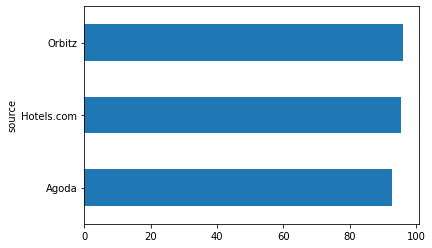

In [ ]:
rotterdam_eda_dataset.groupby('source')['accommodation_price ($USD)'].mean().plot.barh()
plt.show()

Orbitz seems to be the most expensive out of the three. However Hotels.com is close that value while Agoda seems to be a better option for users looking for a cheaper accomodation.
<br>
This and further conclusions are merely based on the data available in the dataset, knowledge of room types, special offers, discounts and more would clearly affect these results.
<br>
Let's go further into this exploration by checking the price difference when two or three sources are offering accommodations in the same hotel.

In [ ]:
aggregated_offers = rotterdam_eda_dataset.groupby('hotel_name')['source', 'accommodation_price ($USD)'].agg(list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
# Dropping the rows where there are no more than one source offering
aggregated_offers = aggregated_offers[aggregated_offers['accommodation_price ($USD)'].str.len()!=1].copy()

In [ ]:
aggregated_offers

,source,accommodation_price ($USD)
hotel_name,,
171. Urban Design Hotel,"[Orbitz, Hotels.com, Agoda]","[92.0, 92.0, 82.0]"
Art Hotel Rotterdam,"[Orbitz, Hotels.com]","[83.0, 83.0]"
Bastion Hotel Rotterdam Alexander,"[Orbitz, Hotels.com, Agoda]","[77.0, 77.0, 77.0]"
Bastion Hotel Rotterdam Zuid,"[Orbitz, Hotels.com, Agoda]","[79.0, 79.0, 79.0]"
Best Western Plus Rotterdam Airport Hotel,"[Hotels.com, Agoda]","[100.0, 101.0]"
Bilderberg Parkhotel Rotterdam,"[Orbitz, Hotels.com, Agoda]","[90.0, 90.0, 95.0]"
CityHub Rotterdam,"[Orbitz, Hotels.com, Agoda, Agoda]","[58.0, 58.0, 56.0, 56.0]"
Days Inn by Wyndham Rotterdam City Centre,"[Hotels.com, Agoda]","[127.0, 127.0]"
Fletcher Hotel Rotterdam-Airport,"[Orbitz, Hotels.com, Agoda]","[82.0, 82.0, 87.0]"


Let's explore prices and ratings. Are higher rated hotels more expensive?

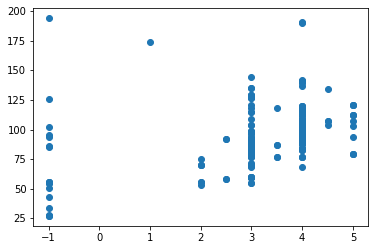

In [ ]:
# Scatter plot of ratings and prices
plt.scatter(rotterdam_eda_dataset['hotel_rating (stars)'], rotterdam_eda_dataset['accommodation_price ($USD)'])
plt.show()

The hotel with 1 star and a high price might be consider an outlier. Further exploration of the data might help detect whether this is an outlier. Is certainly an odd behavior at least. Apart from that, there seem to be certain tendency of having a more expensive price by having a better rating. However, between 4 and 5 stars there might be outliers or in terms of business context there might not be big difference between 4 and 5 star hotels so prices are similar.
This analysis might need a further exploration per source since here we are visualizing all sources together and as we saw above one source was cheaper than the other two.
<br>
Is a 5 star accommodation in Agoda cheaper than an 4 star in Hotels.com? That might be the case

Let's explore prices and reviews. Are higher reviewed hotels cheaper?
This question differs from the last one since users might prefer cheaper accommodations. Higher rating for a hotel would probably be related to more services and higher prices.

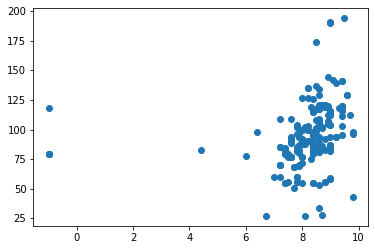

In [ ]:
# Scatter plot of ratings and prices
plt.scatter(rotterdam_eda_dataset['review_score (/10)'], rotterdam_eda_dataset['accommodation_price ($USD)'])
plt.show()

It seems that higher reviewed hotels are NOT cheaper than those with medium or lower reviews. They actually have a tendency to be more expensive.
<br>
This plot is clearly skewed by the presence of the "-1" value in the reviews axis. Removing this should give a better representation of the data.

Let's explore hotel ratings and reviews. Is there any relationship in there? Do higher rated hotels receive better reviews?

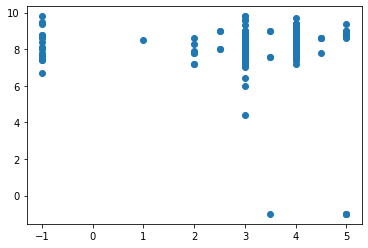

In [ ]:
# Scatter plot of ratings and prices
plt.scatter(rotterdam_eda_dataset['hotel_rating (stars)'], rotterdam_eda_dataset['review_score (/10)'])
plt.show()

The scale needs to be fixed for better visualization and interpretation of results

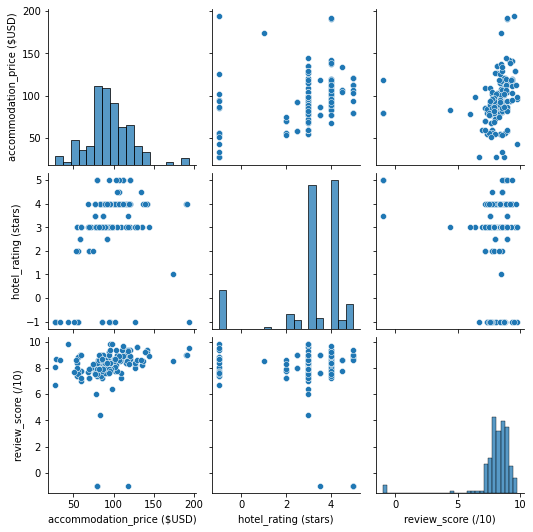

In [ ]:
#plot the pair plot of price, ratings and reviews
sns.pairplot(data = rotterdam_eda_dataset, vars=['accommodation_price ($USD)','hotel_rating (stars)','review_score (/10)'])
plt.show()

Possible further explorations:
* Are hotels closer to the city center more expensive? better reviewed?

### Correlations

In [ ]:
# Creating a correlation matrix using price, ratings and reviews
rotterdam_eda_dataset[['accommodation_price ($USD)', 'hotel_rating (stars)', 'review_score (/10)']].corr()

,accommodation_price ($USD),hotel_rating (stars),review_score (/10)
accommodation_price ($USD),1.000000,0.393756,0.221168
hotel_rating (stars),0.393756,1.000000,-0.065401
review_score (/10),0.221168,-0.065401,1.000000


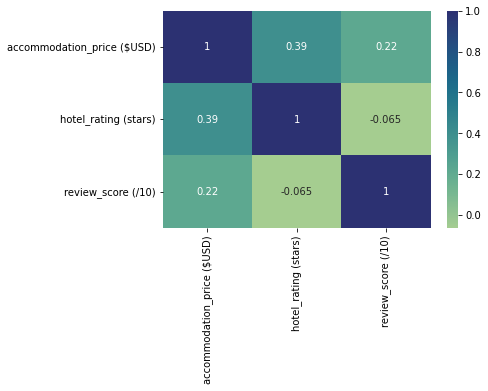

In [ ]:
#plot the correlation matrix 
sns.heatmap(rotterdam_eda_dataset[['accommodation_price ($USD)', 'hotel_rating (stars)', 'review_score (/10)']].corr(), annot=True, cmap = 'crest')
plt.show()